In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Store filepath in a variable
NBA_data = "..\Potential Data Sets\\NBA Free Throw Data.csv"
# Read our Data file with the pandas library

NBA_df = pd.read_csv(NBA_data)

In [3]:
NBA_df["Venue"].fillna('Total',inplace = True)
NBA_df.head()

,Team,Season,Venue,Wins,Loss,Win%,FT Made,FT Att,FT%,Win Rnk,Loss Rnk,Win% Rnk,FT Made Rnk,FT ATT Rnk,FT% Rnk,Total Points
0,Atlanta Hawks,2012-13,Home,25,16,0.610,595,856,0.695,15,15,15,27,24,28,4075
1,Boston Celtics,2012-13,Home,27,13,0.675,675,889,0.759,13,12,13,20,21,15,3940
2,Brooklyn Nets,2012-13,Home,26,15,0.634,724,1003,0.722,14,14,14,11,10,25,4001
3,Charlotte Bobcats,2012-13,Home,15,26,0.366,823,1076,0.765,28,28,28,3,6,11,3955
4,Chicago Bulls,2012-13,Home,24,17,0.585,685,892,0.768,16,16,16,17,20,10,3809


In [4]:
NBA_df["Team"].loc[NBA_df["Team"] == "Los Angeles Clippers"]="LA Clippers"
NBA_df["Team"].loc[NBA_df["Team"] == "Charlotte Bobcats"] = "Charlotte Hornets"
NBA_df["Team"].loc[NBA_df["Team"] == "New Orleans Hornets"] = "New Orleans Pelicans"

C:\Users\Isaac\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Difference between Home and Away free throw attempts total.


#### This section is checking to see if there is a difference in the number of free throw attempts depending if the team is at home or away


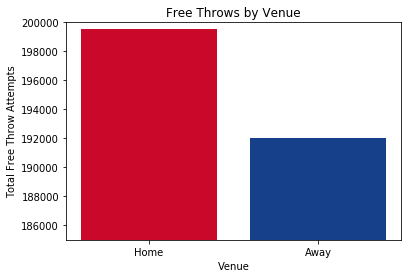

In [5]:
away=NBA_df.loc[NBA_df["Venue"]== "Road"]
home=NBA_df.loc[NBA_df["Venue"] == "Home"]
total=NBA_df.loc[NBA_df["Venue"] == "Total"]

hometotal= home["FT Att"].sum()
awaytotal= away["FT Att"].sum()


plt.bar("Home",hometotal,label="Home Attempts", color="#C9082A")
plt.bar("Away",awaytotal,label="Away Attempts",  color="#17408B")
plt.ylim(185000, 200000)

plt.title("Free Throws by Venue")
plt.xlabel("Venue")
plt.ylabel("Total Free Throw Attempts")
plt.savefig('Home vs Away Bar.png')
plt.show()

## Same data just presented as a pie chart an

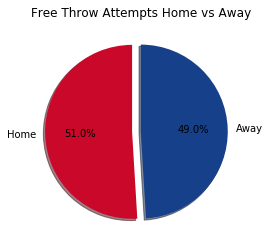

In [6]:
pie_data=[hometotal,awaytotal]

colors = ["#C9082A","#17408B"]
label =["Home","Away"]

plt.pie(pie_data, explode = [.1,0],colors=colors, labels=label, shadow=True, autopct="%1.1f%%", startangle=90)
plt.title("Free Throw Attempts Home vs Away")
plt.savefig('Percent Home vs Away Pie.png')
plt.show()

## Last 7 years free throw attempts per team, (Year and venue)

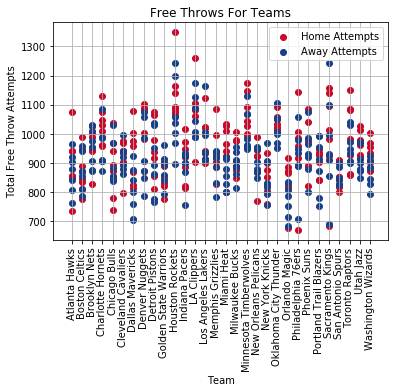

In [7]:

## Home and away free throw attempts by team. Scatter plot


plt.scatter(home["Team"],home["FT Att"],label="Home Attempts", color="#C9082A")
plt.scatter(away["Team"],away["FT Att"],label="Away Attempts",  color="#17408B")
plt.legend()
plt.xticks(rotation=90)
plt.grid()

plt.title("Free Throws For Teams")
plt.xlabel("Team")
plt.ylabel("Total Free Throw Attempts")
plt.savefig('Free Throws For Teams.png')
plt.show()

## By Team Free Throw Ranking

#### Some teams like Houston Rockets,LA Clippers, OKC Thunder are consitantly high in the ranks while teams like the Warriors, and Orlando Magic are always on the low end of the ranking

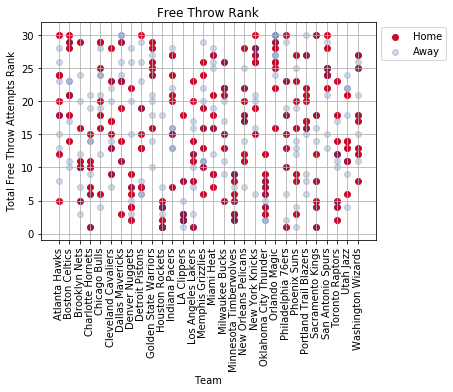

In [8]:
## Home vs away scatter plot by team rank

plt.scatter(home["Team"],home["FT ATT Rnk"],label="Home", color="#C9082A")
plt.scatter(away["Team"],away["FT ATT Rnk"],label="Away",alpha=.2,  color="#17408B")
plt.xticks(rotation=90)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

plt.title("Free Throw Rank")
plt.xlabel("Team")
plt.ylabel("Total Free Throw Attempts Rank")
plt.savefig('Free Throw Rank.png')
plt.show()

## Average number of free throw attempts per game (Home/Away)

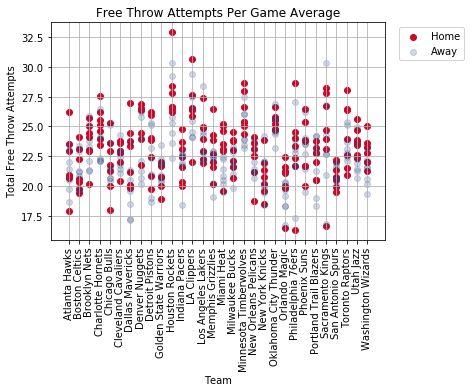

In [9]:
## average free throw attempts by game

plt.scatter(home["Team"],(home["FT Att"]/(home["Wins"]+home["Loss"])),label="Home", color="#C9082A")
plt.scatter(away["Team"],(away["FT Att"]/(away["Wins"]+away["Loss"])),label="Away",alpha=.2,  color="#17408B")
plt.xticks(rotation=90)
plt.grid()

plt.legend(bbox_to_anchor=(1.25, 1))
plt.title("Free Throw Attempts Per Game Average")
plt.xlabel("Team")
plt.ylabel("Total Free Throw Attempts")
plt.savefig('Free Throw Attempts Per Game Average.png')
plt.show()

## Total Team Free Throws

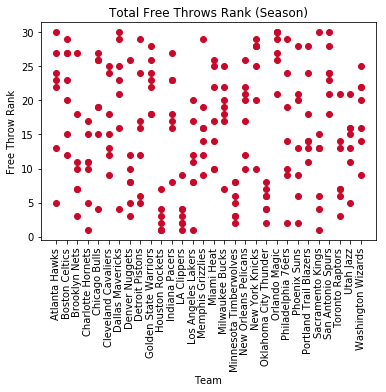

In [10]:
plt.scatter(total["Team"],total["FT ATT Rnk"],label="Attempt Rank", color="#C9082A")
plt.xticks(rotation=90)

plt.title("Total Free Throws Rank (Season)")
plt.xlabel("Team")
plt.ylabel("Free Throw Rank")
plt.savefig('Free_Throw_Rank_season.png')
plt.show()

## Total Free Throw Attempts Per team

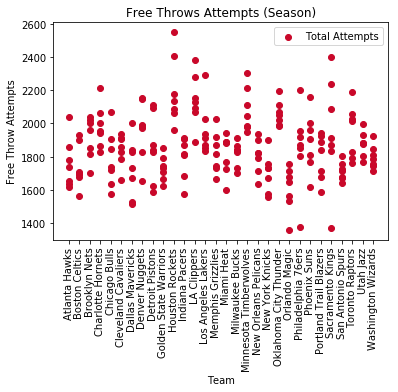

In [11]:
plt.scatter(total["Team"],total["FT Att"],label="Total Attempts", color="#C9082A")
plt.legend()
plt.xticks(rotation=90)
plt.title("Free Throws Attempts (Season)")
plt.xlabel("Team")
plt.ylabel("Free Throw Attempts")
plt.savefig('Free_Throw_Attempts_Season.png')
plt.show()


## Home and Away free throw attempts by season

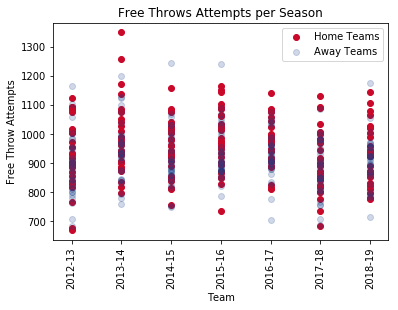

In [12]:


plt.scatter(home["Season"],home["FT Att"],label="Home Teams", color="#C9082A")
plt.scatter(away["Season"],away["FT Att"],label="Away Teams",alpha=.2,  color="#17408B")
plt.legend()
plt.xticks(rotation=90)

plt.title("Free Throws Attempts per Season")
plt.xlabel("Team")
plt.ylabel("Free Throw Attempts")
plt.savefig('Free_Throw_Attempts_By_season.png')
plt.show()

## Free Throw attempts per game per season (team)

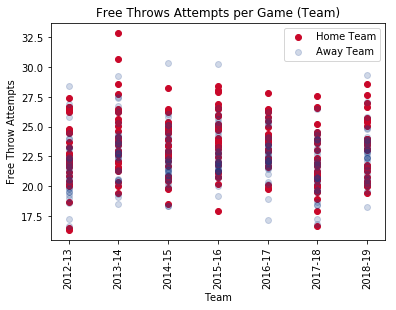

In [13]:
#Bar chart overlayed.

plt.scatter(home["Season"],(home["FT Att"]/(home["Wins"]+home["Loss"])),label="Home Team", color="#C9082A")
plt.scatter(away["Season"],(away["FT Att"]/(away["Wins"]+away["Loss"])),label="Away Team",alpha=.2,  color="#17408B")
plt.legend(loc="upper right")
plt.title("Free Throws Attempts per Game (Team)")
plt.xlabel("Team")
plt.ylabel("Free Throw Attempts")

plt.savefig('Free_Throw_Attempts_per_Game.png')
plt.xticks(rotation=90)
plt.show()

## Doing a Group by team

In [14]:

team_home= home.groupby(["Team"])
team_away= away.groupby(["Team"])
team_total= total.groupby(["Team"])


#### calculating the averages By Team

In [15]:

home_AP = team_home["Total Points"].mean()
home_ftm = team_home["FT Made"].mean()
home_ft_to_points = team_home["FT Made"].mean()/team_home["Total Points"].mean()
home_ftp = team_home["FT%"].mean()
home_wins = team_home["Wins"].mean()

away_AP = team_away["Total Points"].mean()
away_ftm = team_away["FT Made"].mean()
away_ft_to_points = team_away["FT Made"].mean()/team_away["Total Points"].mean()
away_ftp = team_away["FT%"].mean()
away_wins = team_away["Wins"].mean()

total_AP = team_total["Total Points"].mean()
total_ftm = team_total["FT Made"].mean()
total_ft_to_points = team_total["FT Made"].mean()/team_total["Total Points"].mean()
total_ftp = team_total["FT%"].mean()
total_wins = team_total["Wins"].mean()



## Points from Free Throws Home vs Away

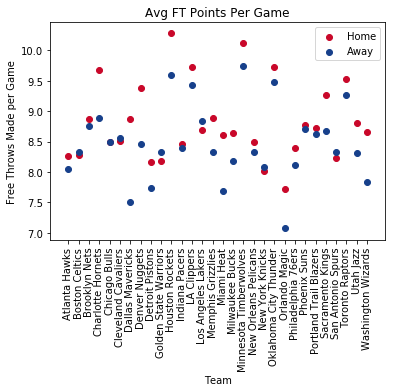

In [16]:

plt.scatter(home_ftm.index,home_ftm/82 ,label="Home", color="#C9082A")
plt.scatter(away_ftm.index,away_ftm/82 ,label="Away",  color="#17408B")
plt.title("Avg FT Points Per Game")
plt.xlabel("Team")
plt.ylabel("Free Throws Made per Game")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.savefig('Avg_FT_PPG.png')
plt.show()

## Free Throw Points Per Season Averaged by Team

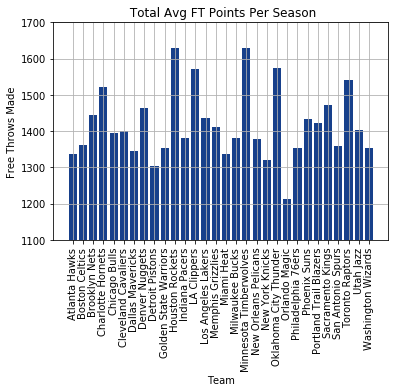

In [17]:
plt.bar(total_ftm.index,total_ftm ,  color="#17408B")
plt.grid()
plt.ylim(1100, 1700)
plt.xticks(rotation=90)
plt.title(" Total Avg FT Points Per Season")
plt.xlabel("Team")
plt.ylabel("Free Throws Made")
plt.savefig('Avg_FT_Points_Per_Season.png')

plt.show()

## Percentage of a teams Total Points that come from FT

#### Even though they don't get the highest number of attempts in a season they have the highest percentage of their points come from

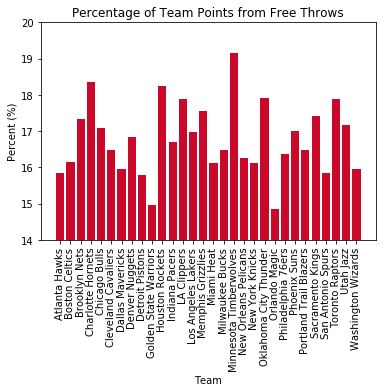

In [18]:
# Percentage of a teams overall points from Free Throws
plt.bar(total_ft_to_points.index, total_ft_to_points*100, color="#C9082A")
plt.ylim(14, 20)
plt.title("Percentage of Team Points from Free Throws")
plt.xlabel("Team")
plt.ylabel("Percent (%)")
plt.xticks(rotation=90)
plt.savefig('Free_Throw_PPG.png')
plt.show()

## This plot shows the percentage of a teams total points that are achieved from making freethrows

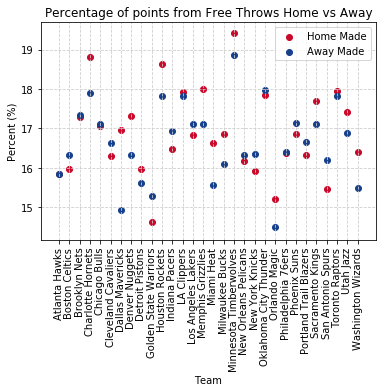

In [19]:
plt.scatter(home_ft_to_points.index,home_ft_to_points*100.0 ,label="Home Made", color="#C9082A")
plt.scatter(away_ft_to_points.index,away_ft_to_points*100.0 ,label="Away Made",  color="#17408B")
#plt.ylim(.14, .2)
plt.legend(loc="upper right")
plt.title("Percentage of points from Free Throws Home vs Away")

plt.xlabel("Team")
plt.ylabel("Percent (%)")

plt.xticks(rotation=90)
plt.grid(ls = '--', c = '.80')
plt.savefig('Pct_of_total_Points_FT.png')
plt.show()

## Teams Average Free Throw Percentage vs Team Avg Wins

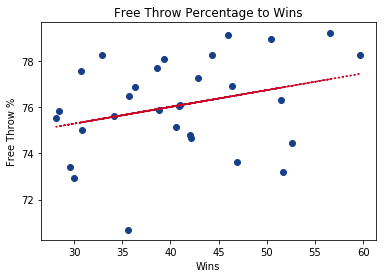

In [22]:
plt.scatter(total_wins,total_ftp*100, color="#17408B")
#plt.scatter(away_ft_to_points.index,away_ft_to_points ,label="Away Made",  color="#17408B")


plt.title("Free Throw Percentage to Wins")

plt.xlabel("Wins")
plt.ylabel("Free Throw %")

x = total_wins
y =total_ftp*100

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle=':',color="#C9082A" )

plt.savefig('FTP_to_Wins.png')

plt.show()

## Avg Wins per season to Avg FT Points per Game

#### The top 2 teams in average wins are below the trend line but the next 4 teams are above it.

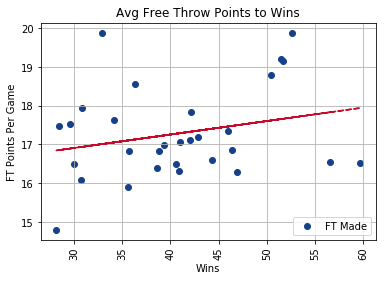

In [23]:
plt.scatter(total_wins,total_ftm/82, color="#17408B")
#plt.scatter(away_ft_to_points.index,away_ft_to_points ,label="Away Made",  color="#17408B")

plt.legend(loc="lower right")
plt.title("Avg Free Throw Points to Wins")

plt.xlabel("Wins")
plt.ylabel("FT Points Per Game")
plt.xticks(rotation=90)
plt.grid()
x = total_wins
y =total_ftm/82

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )
plt.savefig('Free_Throw_PPG_avg.png')
plt.show()

## Creating a dataframe for Average FT stats

In [122]:
team_df =pd.DataFrame({
'home_AP' : team_home["Total Points"].mean(),
'home_ftm' :  team_home["FT Made"].mean(),
'home_ft_to_points%' : (team_home["FT Made"].mean()/team_home["Total Points"].mean())*100,
'home_fta_pg': team_home["FT Att"].mean(),
'home_ftp%' : (team_home["FT%"].mean())*100,
'home_wins' : team_home["Wins"].mean()/82,

'away_AP' : team_away["Total Points"].mean(),
'away_ftm' : team_away["FT Made"].mean(),
'away_ft_to_points%' : (team_away["FT Made"].mean()/team_away["Total Points"].mean())*100,
'away_ftp%' : (team_away["FT%"].mean())*100,
'away_wins' : team_away["Wins"].mean(),

'total_AP' : team_total["Total Points"].mean(),
'total_ftm' : team_total["FT Made"].mean(),
'total_ft_to_points%' : (team_total["FT Made"].mean()/team_total["Total Points"].mean())*100,
'total_ftp%' : (team_total["FT%"].mean())*100,
'total_wins' : team_total["Wins"].mean(),

})

team_df.head()


,home_AP,home_ftm,home_ft_to_points%,home_fta_pg,home_ftp%,home_wins,away_AP,away_ftm,away_ft_to_points%,away_ftp%,away_wins,total_AP,total_ftm,total_ft_to_points%,total_ftp%,total_wins
Team,,,,,,,,,,,,,,,,
Atlanta Hawks,4279.000000,677.714286,15.838146,892.142857,76.100000,0.290941,4170.000000,660.142857,15.830764,76.014286,17.000000,8449.000000,1337.857143,15.834503,76.042857,40.857143
Boston Celtics,4254.571429,679.142857,15.962662,869.285714,78.085714,0.308362,4183.857143,682.571429,16.314406,78.514286,19.000000,8438.428571,1361.714286,16.137060,78.285714,44.285714
Brooklyn Nets,4202.000000,727.000000,17.301285,966.000000,75.271429,0.238676,4142.857143,718.571429,17.344828,75.971429,14.571429,8344.857143,1445.571429,17.322902,75.614286,34.142857
Charlotte Hornets,4219.000000,793.428571,18.806081,1030.142857,77.028571,0.273519,4069.142857,728.571429,17.904789,76.828571,13.857143,8288.142857,1522.000000,18.363583,76.900000,36.285714
Chicago Bulls,4084.142857,697.000000,17.066004,889.000000,78.328571,0.270035,4074.428571,696.714286,17.099681,77.800000,17.142857,8158.571429,1393.714286,17.082823,78.085714,39.285714
